# ISLR- Python: Ch3 -- Applied Question 14

- [Generate Data](#Generate-Data)
- [Measure Variable Correlations](#Measure-Variable_Correlations)
- [Fit Least Squares Regression](#Fit-Least-Squares-Regression)
- [Fit Least Squares Regression for One Variable](#Fit-Least-Squares-Regression-for-One-Variable)
- [Fit Least Squares Regression with Possible High Leverage or Outlier](#Fit-Least-Squares-Regression-with-Possible-High-Leverage-or-Outlier)

In [1]:
# perform standard imports
import statsmodels.api as sm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix 
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

## Generate Data

#### Make a model of the form $y = 2 + 2 x_1 + 0.3 x_2 + \epsilon$ where $x_1 \sim Uni(0,1)$ and $x_2 = 0.5 x_1 + \frac{\epsilon}{10}$ where $\epsilon \sim N(0,1)$. Here $\left[\beta_1, \beta_2, \beta_3\right] = \left[2, 2, 0.3\right]$.

In [2]:
# Create the poplulation regression
np.random.seed(0)
x1 = np.random.random(100)
x2 = 0.5 * x1 + np.random.randn(100)/10
y = (2 + 2*x1 + 0.3*x2 + np.random.randn(100))

## Measure Variable Correlations

In [3]:
# The correlation between x1 and x2
correlation = np.corrcoef(x1,x2)
print('The correlation between x1 and x2 is', correlation[0,1])

df = pd.DataFrame(np.column_stack((y,x1,x2)), columns=['y','x1','x2'] )
df.head()

The correlation between x1 and x2 is 0.819263355822


,y,x1,x2
0,2.791001,0.548814,0.157892
1,2.189731,0.715189,0.447677
2,2.666293,0.602763,0.347948
3,0.902008,0.544883,0.118817
4,3.580737,0.423655,0.360653


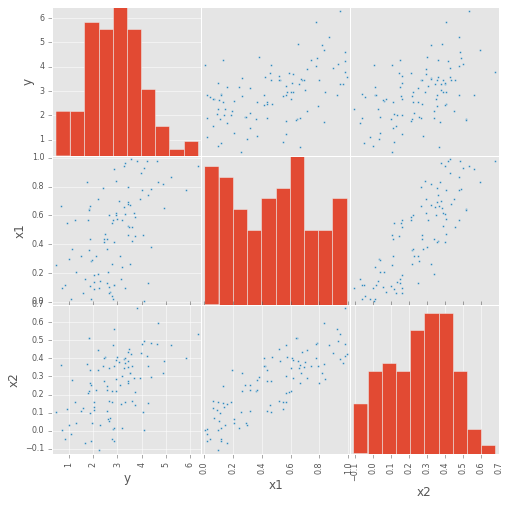

In [97]:
scatter_matrix(df, figsize = (8,8),alpha=1);

## Fit Least Squares Regression

In [4]:
# create design matrix, model and fit
X = sm.add_constant(df[['x1','x2']])
model = sm.OLS(df.y,X)
estimate = model.fit()
print(estimate.summary())
print('\n')
print('[beta_0, beta_1, beta_2] are ',estimate.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Mon, 30 Jan 2017   Prob (F-statistic):           4.16e-07
Time:                        18:48:48   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.9217      0.191     10.071      0.0

#### The intercept $\beta_0 = 1.92$ is significant and $\beta_1$ is barely significant so we reject the hypothesis that $\beta_0=0$ and the hypothesis that $\beta_1=0$ but we can't reject the hypothesis that $\beta_2 = 0$. Also notice the SE and confidence intervals for all three coeffecients are verly large.

## Fit Least Squares Regression for One Variable

In [5]:
# Fit a least squares regression using only x1
X = sm.add_constant(df.x1)
model_x1 = sm.OLS(df.y,X)
estimate_x1 = model_x1.fit()

print('########## Model using x1 predictor ##########')
print(estimate_x1.summary())

print('\n')

# Fit a least squares regression using x2
X2 = sm.add_constant(df.x2)
model_x2 = sm.OLS(df.y,X2)
estimate_x2 = model_x2.fit()
print('########## Model Using x2 predictor ##########')
print(estimate_x2.summary())

########## Model using x1 predictor ##########
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Mon, 30 Jan 2017   Prob (F-statistic):           1.76e-07
Time:                        18:49:45   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const

#### In model 1, $y \sim x_1$, we find that the coeffecient is close to the true value and is now very significant. In model 2 $y \sim x_2$, we find that the coeffecient for $x_2$ is now very significant. Note there is no contradiction here. $x_1$ and $x_2$ are strongly correlated and each is related to $y$ independent of each other. Only $x_1 \,or\, x_2$ is needed to caputure the models systematic variance.  

## Fit Least Squares Regression with Possible High Leverage or Outlier

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     22.13
Date:                Mon, 30 Jan 2017   Prob (F-statistic):           1.14e-08
Time:                        18:50:19   Log-Likelihood:                -143.09
No. Observations:                 102   AIC:                             292.2
Df Residuals:                      99   BIC:                             300.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.9708      0.192     10.281      0.0

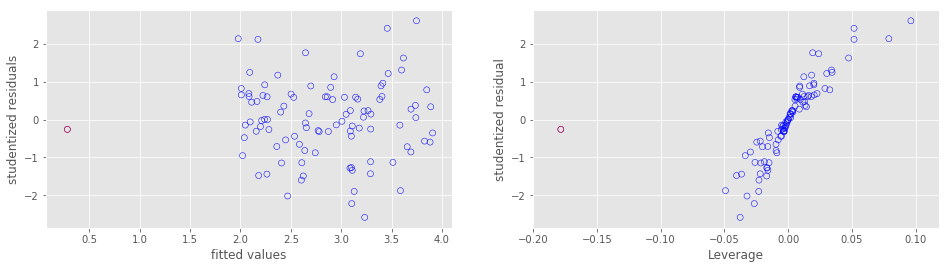

In [7]:
# append new data points onto x1 and x2 and y
df.loc[len(df)] = [0.1, 0.8, 6]

# create design matrix, model and fit for multiple regression
X = sm.add_constant(df[['x1','x2']])
model = sm.OLS(df.y, X)
estimate = model.fit()

# print the betas and the p values
print(estimate.summary())

# Obtain the residuals, studentized residuals and the leverages
fitted_values = estimate.fittedvalues.values
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

# Studentized Residuals
ax1.scatter(fitted_values[:-1], studentized_residuals[:-1], facecolors='none', edgecolors='b');
# Plot the possible Outlier in red
ax1.scatter(fitted_values[-1], studentized_residuals[-1], facecolors='none', edgecolors='r');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('studentized residuals');

# Leverages
ax2.scatter(leverages[:-1], studentized_residuals[:-1], facecolors='none', edgecolors='b');
# plot the possible high leverager in red
ax2.scatter(leverages[-1], studentized_residuals[-1], facecolors='none', edgecolors='r');
ax2.set_xlabel('Leverage');
ax2.set_ylabel('studentized residual');

#### Several very important things to note. When we added the possible outlier/leverage point, all the coeffecients became significant. This shows how a single point can cause havoc when multi-collinearity is present. The coeffecient estimates are wildly different than in any of the previous models. Secondly, we confirmed that the point we added was indeed a high leverage point though not an outlier. In fact on different runs of this code different coeffecients of $\beta$ occur.